### Student Information
Name:吳旻聖

Student ID: 107061619

GitHub ID: AkiraWu

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

# Take home exercises for Lab 1

### 1. Setting up the envoriment, and the datas that will be used.

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
X.loc[10:][:10]

,text,category,category_name
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
17,Organization: Penn State University From: <JSN...,0,alt.atheism
18,From: tom_milligan@rainbow.mentorg.com Subject...,3,soc.religion.christian
19,Subject: Re: Don't more innocents die without ...,0,alt.atheism


### 4.1 Missing Values
### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [4]:
# Answer here
#Because the thing in '' is a string, not actually a None

### 5.1 Sampling
### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [5]:
X_sample = X.sample(n=1000)
# the index of X is randomly shuffled, and 1000 samples was randomly picked

In [6]:
#Answer
# the index of X is randomly shuffled, and 1000 samples was randomly picked

### Continue to the next stage, visualizing

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise.

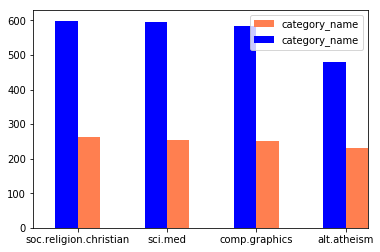

In [8]:
ax = X_sample.category_name.value_counts().plot(kind='bar', color='coral',position=0, width=0.25,legend=True)
X.category_name.value_counts().plot(kind='bar', color='blue',position=1,rot=0, width=0.25, legend=True)

### 5.3 Feature subset selection

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [10]:
#Exercise 10 (take home)
count_vect.get_feature_names()[np.where(X_counts[0:5,0:100].toarray()==1)[1][1]]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [11]:
freq = pd.Series(' '.join(X['text']).split()).value_counts()[:30]
freq = list(freq.index)
Xtest=X
Xtest['text'] = Xtest['text'].apply(lambda x: " ".join(x for x in x.split() if x in freq))
X_countsre = count_vect.fit_transform(Xtest.text)

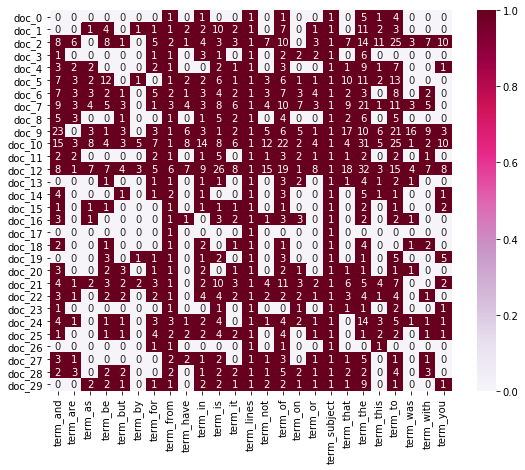

In [13]:
import seaborn as sns
plot_x1 = ["term_"+str(i) for i in count_vect.get_feature_names()[0:30]]
plot_y1 = ["doc_"+ str(i) for i in list(X.index)[0:30]]
plot_z1 = X_countsre[0:30, 0:30].toarray()
df_todraw1 = pd.DataFrame(plot_z1, columns = plot_x1, index = plot_y1)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw1,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
#I only show the 30 most frenquently used words in the data

In [14]:
#Redifine all the datas
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X_counts = count_vect.fit_transform(X.text)

### 5.4 Dimensionality Reduction

In [15]:
from sklearn.decomposition import PCA

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

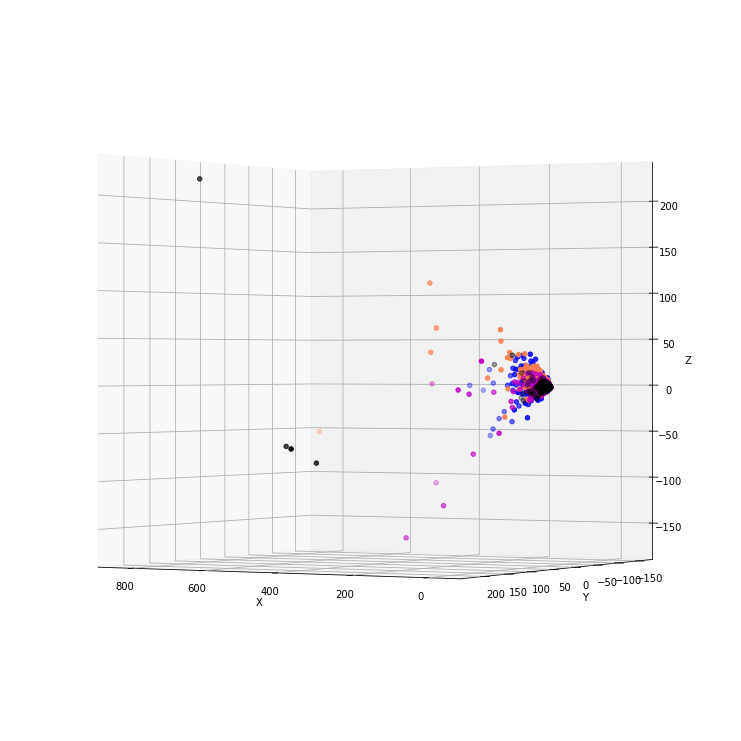

In [16]:
#Exercise 12 (take home)
X_reduced3d = PCA(n_components = 3).fit_transform(X_counts.toarray())
from mpl_toolkits.mplot3d import Axes3D

# plot
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)

col = ['coral', 'blue', 'black', 'm']
for c, category in zip(col, categories):
    xs = X_reduced3d[X['category_name'] == category].T[0]
    ys = X_reduced3d[X['category_name'] == category].T[1]
    zs = X_reduced3d[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c,marker='o')  

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.view_init(0, 120)
plt.show()


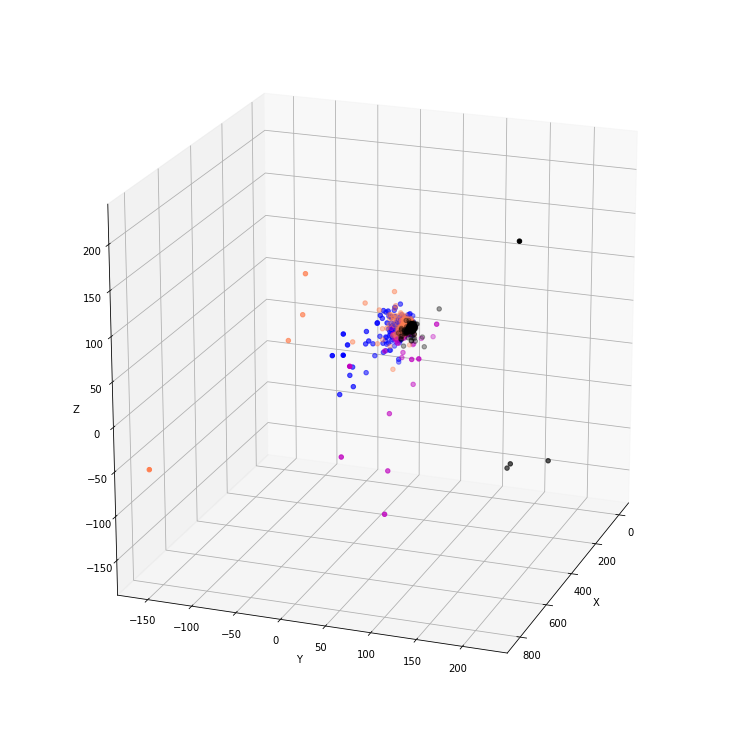

In [17]:
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced3d[X['category_name'] == category].T[0]
    ys = X_reduced3d[X['category_name'] == category].T[1]
    zs = X_reduced3d[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c,marker='o')  

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.view_init(20, 0)
ax.view_init(20, 20)
plt.show()

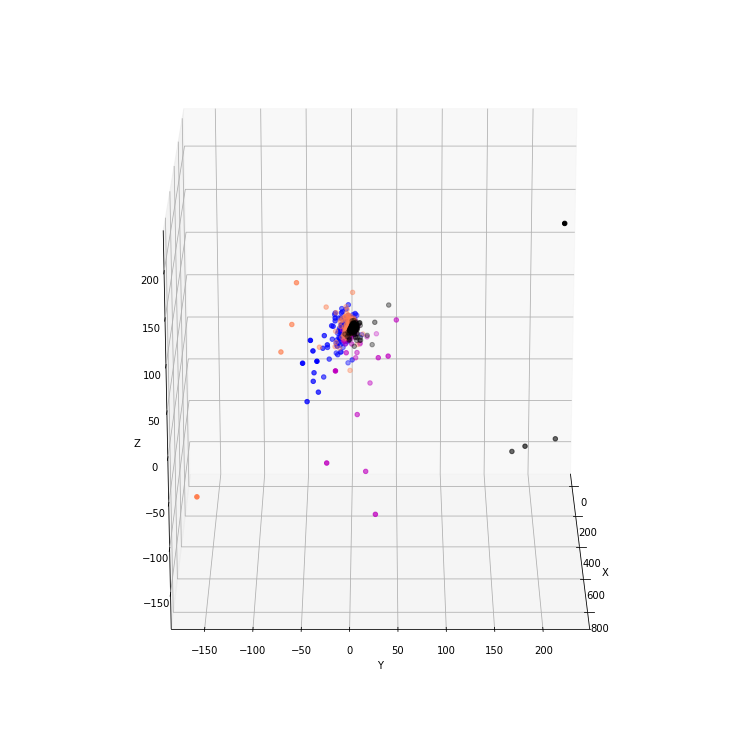

In [18]:
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced3d[X['category_name'] == category].T[0]
    ys = X_reduced3d[X['category_name'] == category].T[1]
    zs = X_reduced3d[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c,marker='o')  

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.view_init(20, 0)
plt.show()

#### Answer :
I see that in X axis, sci.med tend to have bigger values, comp.graphics has a smaller X and bigger Y, all in all I find out that different categories are seperated in the space.

### 5.5 Atrribute Transformation / Aggregation

In [19]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [20]:
# Exercise 13 (take home)
# Answer here
import plotly.plotly as py
import helpers.text_analysis as ta
import plotly
plotly.tools.set_credentials_file(username='stu970029', api_key='0pgSC71sQeIx7Zmuy5fN')
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

C:\Users\Akira\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Users\Akira\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [21]:
#I only want the 60~90th most frequently used words
freq2 = pd.Series(' '.join(X['text']).split()).value_counts()[60:90]
freq2 = list(freq2.index)
term_frequenciesre = np.asarray(X_countsre.sum(axis=0))[0]
py.iplot(ta.plot_word_frequency([freq2, term_frequenciesre], "Term Frequency Distribution"))

C:\Users\Akira\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [22]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), sorted(term_frequencies,key=lambda x: -x)], "Term Frequency Distribution"))

C:\Users\Akira\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


C:\Users\Akira\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### 5.6 Discretization and Binarization

In [24]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [25]:
# Exercise 16 (take home)
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
#Yes, it does work!

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


## All take home exercise is above. 

# Next is the first assignment.

In [26]:
### Begin Assignment Here!
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import math

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reading the Datas
I read the data row by row, in order to let it automatically change rows for us.

In [28]:
with open('C:/Users/Akira/iCloudDrive/Desktop/data/DM/sentiment labelled sentences/amazon_cells_labelled.txt','r') as data:
    amazon = data.readlines()
with open('C:/Users/Akira/iCloudDrive/Desktop/data/DM/sentiment labelled sentences/imdb_labelled.txt','r',encoding = 'utf8') as data:
    imdb = data.readlines()
with open('C:/Users/Akira/iCloudDrive/Desktop/data/DM/sentiment labelled sentences/yelp_labelled.txt','r') as data:
    yelp = data.readlines()

In [29]:
#Define a funtion that help us turn the raw datas into dataframe. It use "\t" to split, and get rid of the "\n".
def todf(x):
    for i in range(len(x)):
      x[i]=x[i].split("\t")
      (x[i])[1]=(x[i])[1].rstrip()
    return

In [30]:
#access the function define above to change the datas into dataframe.
todf(amazon)
todf(imdb)
todf(yelp)

In [31]:
dfamazon=pd.DataFrame(amazon)
dfimdb=pd.DataFrame(imdb)
dfyelp=pd.DataFrame(yelp)

In [32]:
df=pd.concat([dfamazon,dfimdb,dfyelp])
df.columns=['sentence','score']

In [33]:
#printing out the first three rows
for t in df.sentence[:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


# Query the datas

Then, I use some function to do the query of the datas. Including iloc, and loc.

In [34]:
df.iloc[::10, :][0:10]

,sentence,score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [35]:
# using loc (by label)
df.loc[::10, 'sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: sentence, dtype: object

# Checking nulls
Checking if the datas have missing values or not.

In [36]:
#check if there are null or not
df.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [37]:
#check by columns
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [38]:
#check by rows
df.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
5      (The amoung of missing records is: , 0)
6      (The amoung of missing records is: , 0)
7      (The amoung of missing records is: , 0)
8      (The amoung of missing records is: , 0)
9      (The amoung of missing records is: , 0)
10     (The amoung of missing records is: , 0)
11     (The amoung of missing records is: , 0)
12     (The amoung of missing records is: , 0)
13     (The amoung of missing records is: , 0)
14     (The amoung of missing records is: , 0)
15     (The amoung of missing records is: , 0)
16     (The amoung of missing records is: , 0)
17     (The amoung of missing records is: , 0)
18     (The amoung of missing records is: , 0)
19     (The amoung of missing records is: , 0)
20     (The amoung of missing records is: , 0)
21     (The a

# Sample from the datas, and visualize

I sample 1000 samples of the datas, then plot both the original and the samples' distributions.

In [39]:
#randomly sample 1000 samples
df_sample = df.sample(n=1000)

In [40]:
#show 10 samples
df_sample[0:10]

,sentence,score
510,"Things happen, characters personalities change...",0
499,Waitress was sweet and funny.,1
236,"The worst, sappiest dialogue... I could go on ...",0
556,"Both films are terrible, but to the credit of ...",0
292,"The staff is great, the food is delish, and th...",1
948,nice leather.,1
827,"Plus, with the movie's rather modest budget an...",1
648,Great food.,1
258,"Overall, this movie was cheap trash.",0
227,The folks at Otto always make us feel so welco...,1


1    1500
0    1500
Name: score, dtype: int64


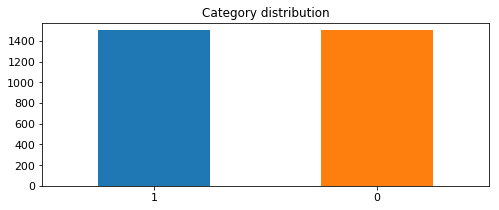

In [41]:
print(df.score.value_counts())

# plot barchart for df
df.score.value_counts().plot(kind = 'bar',
                             title = 'Category distribution',        
                             rot = 0, fontsize = 11, figsize = (8,3))

1    520
0    480
Name: score, dtype: int64


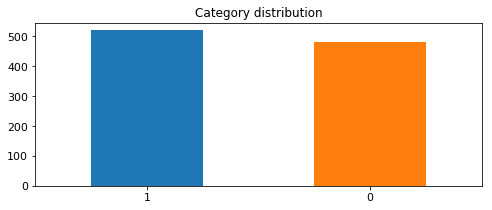

In [42]:
print(df_sample.score.value_counts())

# plot barchart for df_sample
df_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    rot = 0, fontsize = 11, figsize = (8,3))

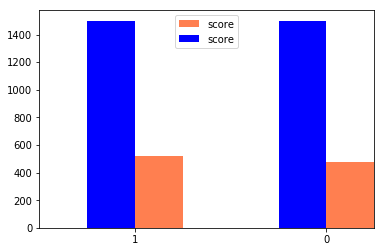

In [43]:
#plot df and df_sample side by side
ax = df_sample.score.value_counts().plot(kind='bar', color='coral',position=0, width=0.25,legend=True)
df.score.value_counts().plot(kind='bar', color='blue',position=1,rot=0, width=0.25, legend=True)


# Spliting the sentences into single words

I use the given function to split the sentences, and do some query to see the effects.

In [44]:
#use the function in the data mining helper
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [45]:
#use the function provided to change the sentences into unigrams
df['unigrams'] = df['sentence'].apply(lambda x: tokenize_text(x))

In [46]:
#a simply query and see what changes
df[0:10]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]"


# Words Frequency

Using the function build in Sci-kit learn to count the word's appearence time in the data, and also apply the TF-IDF analysis.
And also visualize.

In [47]:
#create the count of frequency object and turn it into array
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

(-0.5, 399.5, 199.5, -0.5)

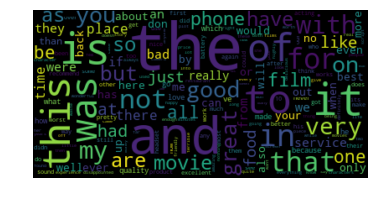

In [48]:
#create a wordcloud with the counts vector
vec = pd.concat([pd.DataFrame(count_vect.get_feature_names()),pd.DataFrame(term_frequencies)],axis=1)
vec.columns=['word','count']

d = {}
for a, x in vec.values:
    d[a] = x

from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [49]:
#create the tf-idf object
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df.sentence)
tfidfarr = np.asarray(tfidf.sum(axis=0))[0]

In [50]:
#plot the term freqency plot
import plotly.plotly as py
import helpers.text_analysis as ta
import plotly
plotly.tools.set_credentials_file(username='stu970029', api_key='0pgSC71sQeIx7Zmuy5fN')
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

C:\Users\Akira\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [51]:
import plotly.plotly as py
import helpers.text_analysis as ta
import plotly
plotly.tools.set_credentials_file(username='stu970029', api_key='0pgSC71sQeIx7Zmuy5fN')
py.iplot(ta.plot_word_frequency([vectorizer.get_feature_names(), term_frequencies], "TF-IDF"))

C:\Users\Akira\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




### In the plot we can see that the plot of the TF-IDF is same as the frequency one, cause the TF-IDF is dealing with the weights of the word, but not removing it.

In [52]:
#Also, make a long tail plot.
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), sorted(term_frequencies,key=lambda x: -x)], "Term Frequency Distribution"))

C:\Users\Akira\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




# PCA

In [53]:
from sklearn.decomposition import PCA
df_counts.shape

(3000, 5155)

### As in the lab session, I first reduce the dimension in to 2

In [54]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

#### Plot the distribution of the reduced one

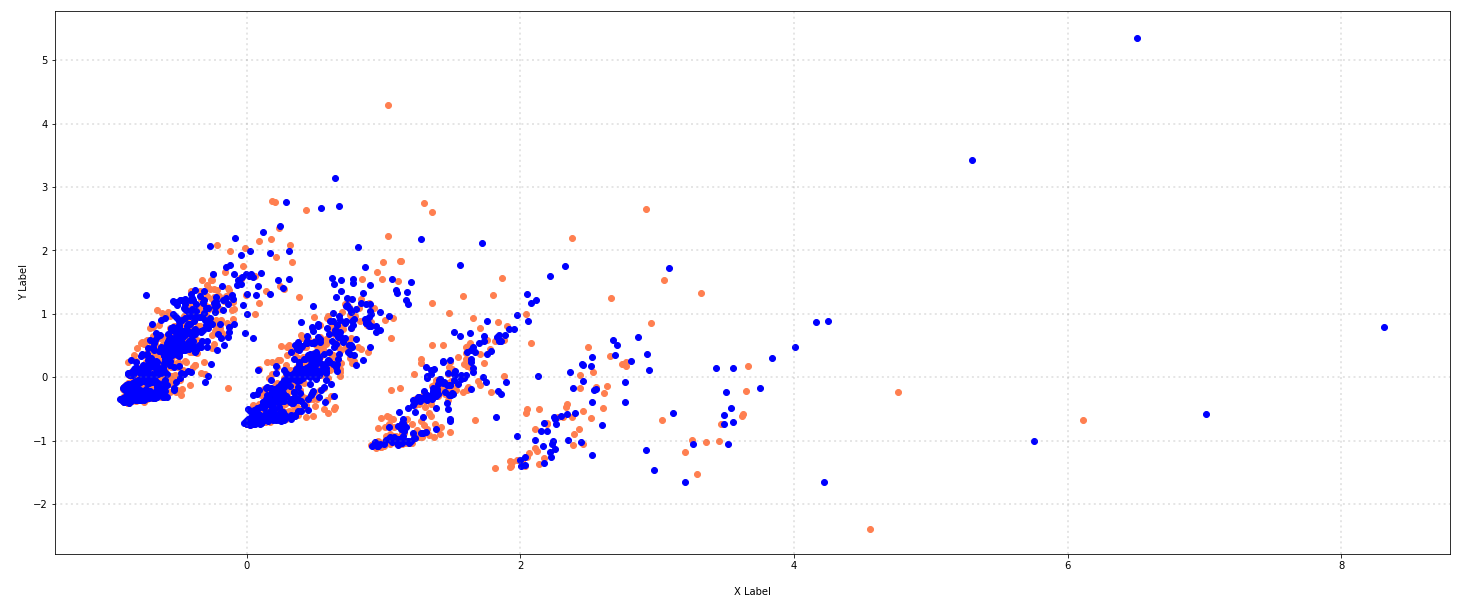

In [55]:
categories = ['0','1']
col = ['coral', 'blue']


# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['score'] == category].T[0]
    ys = df_reduced[df['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### Then I reduced the dimension into 3

In [56]:
#reduce the data's dimension into 3
df_reduced3d = PCA(n_components = 3).fit_transform(df_counts.toarray())

#### Also, visualize it.

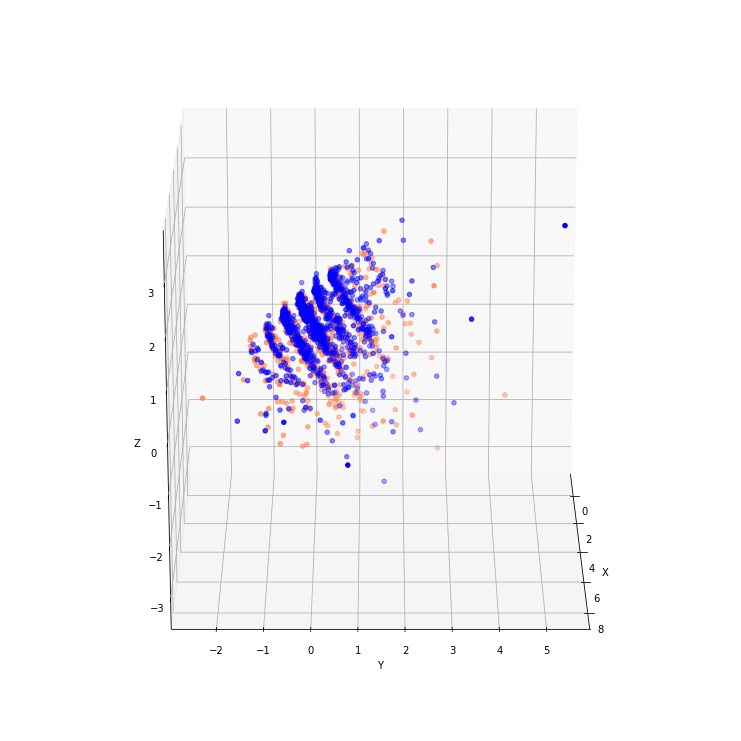

In [57]:
#plot the 3D plot of the dimension reduced data
from mpl_toolkits.mplot3d import Axes3D

# plot
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = df_reduced3d[df['score'] == category].T[0]
    ys = df_reduced3d[df['score'] == category].T[1]
    zs = df_reduced3d[df['score'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c,marker='o')  

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.view_init(20, 0)
plt.show()

### Change the camera position in order to see the orange points 

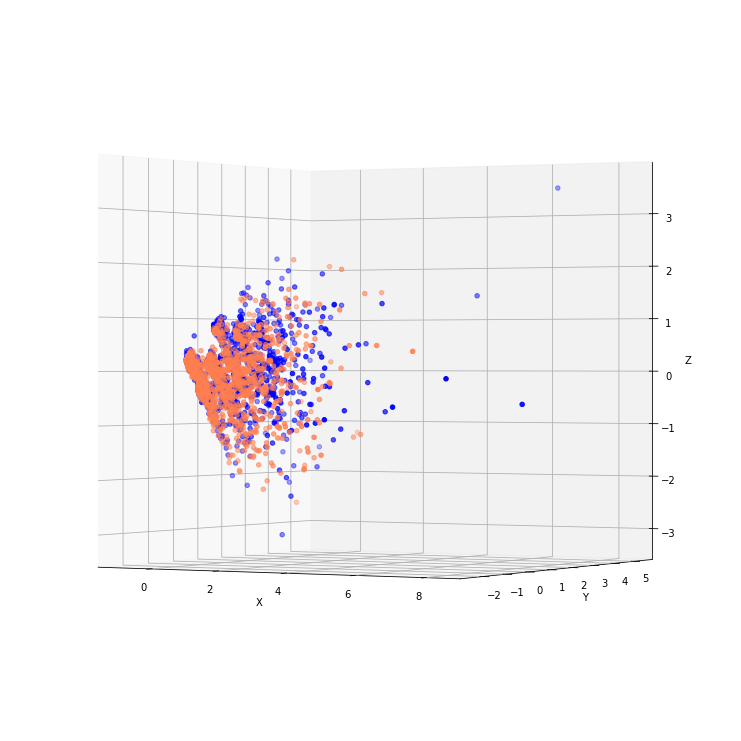

In [58]:
#Viewing from different camera positions 
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
for c, category in zip(col, categories):
    xs = df_reduced3d[df['score'] == category].T[0]
    ys = df_reduced3d[df['score'] == category].T[1]
    zs = df_reduced3d[df['score'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c,marker='o')  

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.view_init(0, -60)
plt.show()

### Viewing at a another camera position

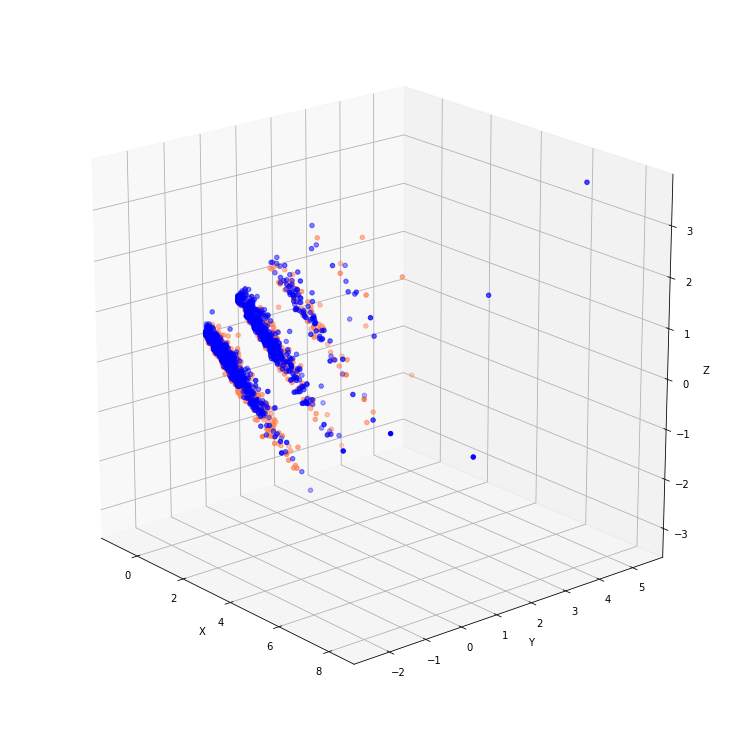

In [59]:
#Viewing from different camera positions
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
for c, category in zip(col, categories):
    xs = df_reduced3d[df['score'] == category].T[0]
    ys = df_reduced3d[df['score'] == category].T[1]
    zs = df_reduced3d[df['score'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c,marker='o')  

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.view_init(20, -40)
plt.show()

### In this position I found out that the points are almost combined into several lines (looks like being scratched a cat), which I think was really interesting.

# Calculate the Similarity Between Sentences


In [60]:
#Import the needed functions
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
#Calculating the similarity of the word counts object
simfreq = cosine_similarity(df_counts, Y=None, dense_output=True)
simfreq

array([[1.        , 0.        , 0.21821789, ..., 0.06579517, 0.16366342,
        0.34188173],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21821789, 0.        , 1.        , ..., 0.        , 0.125     ,
        0.26111648],
       ...,
       [0.06579517, 0.        , 0.        , ..., 1.        , 0.22613351,
        0.        ],
       [0.16366342, 0.        , 0.125     , ..., 0.22613351, 1.        ,
        0.21759707],
       [0.34188173, 0.        , 0.26111648, ..., 0.        , 0.21759707,
        1.        ]])

In [62]:
#Calculating the similarity of the TF-IDF object
simtfidf= cosine_similarity(tfidf, Y=None, dense_output=True)
simtfidf

array([[1.        , 0.        , 0.07199012, ..., 0.07993595, 0.07651154,
        0.13982957],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07199012, 0.        , 1.        , ..., 0.        , 0.01677073,
        0.03746697],
       ...,
       [0.07993595, 0.        , 0.        , ..., 1.        , 0.12109979,
        0.        ],
       [0.07651154, 0.        , 0.01677073, ..., 0.12109979, 1.        ,
        0.05887434],
       [0.13982957, 0.        , 0.03746697, ..., 0.        , 0.05887434,
        1.        ]])

I found out that almost all the similarity in the tfidf matrix are smaller than the original frequency one, which means that the TF-IDF is dealing with the weights, reducing the word with high appearence ! 




# Build a Classifier
Use the pipeline function in sci-kit learn to create a pipeline from the datas all away to the classifier of both the counts vector and the TF-IDF vector, and also calculate the accuracy after we builded.

In [63]:
#import the package and function which we need when building a classifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

In [64]:
#use the word frequency vector to build a classifier, and use it to predict and test the accuracy
text_freq = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB()),
])
 
text_freq.fit(df.sentence, df.score)
predictedfreq = text_freq.predict(df.sentence)
accfreq = np.mean(predictedfreq == df.score) 
accfreq

0.9453333333333334

In [65]:
#use the tf-idf vector to build a classifier, and use it to predict and test the accuracy
text_tfidf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])
 
text_tfidf.fit(df.sentence, df.score)
predictedtfidf = text_tfidf.predict(df.sentence)
acctfidf = np.mean(predictedtfidf == df.score) 
acctfidf

0.953

We can see that the accurcy of TF-IDF classifier is higher than the word frequency. Which means that the TF-IDF method is really improving!